<a href="https://colab.research.google.com/github/bharath143-vk/Customer_Churn_Prediction/blob/main/Telco_Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import joblib

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [4]:
df=pd.read_csv('/content/drive/My Drive/ML PROJECTS/Customer Churn/Telco_Customer_Churn.csv')

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data statistics

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# check for missing values

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- No missing values found

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(subset=['TotalCharges'],inplace=True)

### check whether data is balanced or not

In [10]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [11]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

# Data Visualization

<Axes: xlabel='TotalCharges', ylabel='Count'>

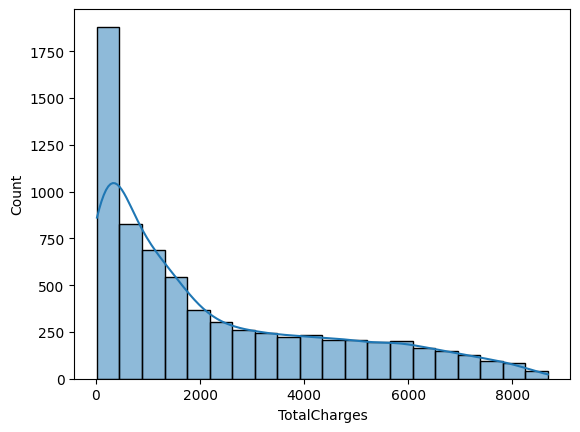

In [12]:
sns.histplot(data=df,x='TotalCharges',bins=20,kde=True)

- the less total charges are high in number

<Axes: xlabel='TotalCharges', ylabel='Count'>

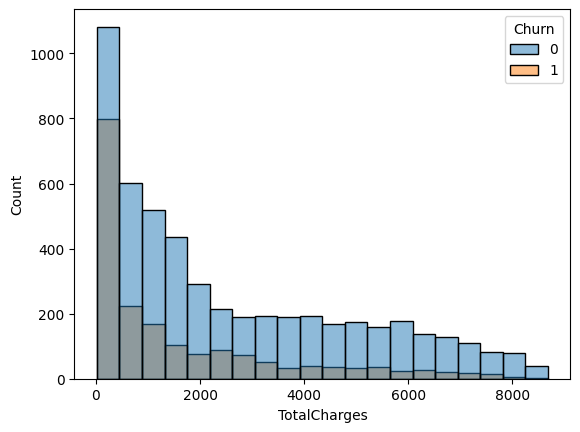

In [13]:
sns.histplot(data=df,x='TotalCharges',bins=20,hue='Churn')

the people who are paying between 0 to 500 have maximum churn

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

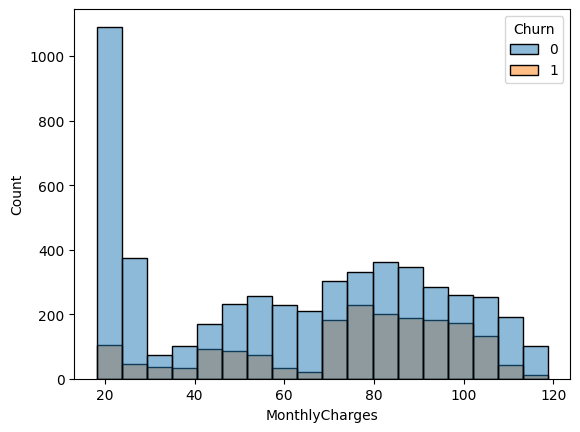

In [14]:
sns.histplot(data=df,x='MonthlyCharges',hue='Churn')

- the people with high monthly charges (70 to 100) are likely to churn

<Axes: xlabel='tenure', ylabel='Count'>

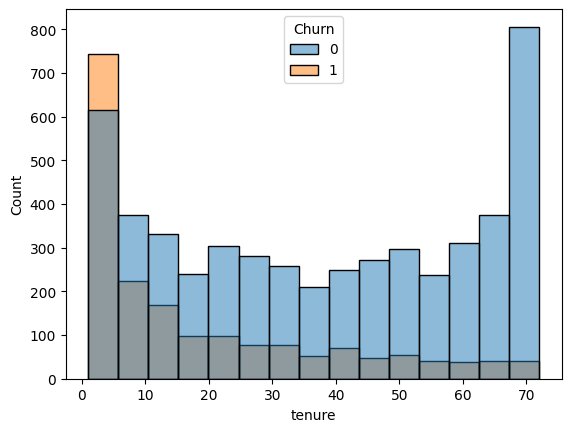

In [15]:
sns.histplot(data=df,x='tenure',hue='Churn')

The people with less tenure (0 to 5) are more likely to churn

# To check whether we can proceed with one hot encoding or not

In [16]:
categ_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical columns:", categ_cols)

for feature in categ_cols:
    if df[feature].nunique() > 6:
        print(f"Feature name: {feature}, values count: {df[feature].nunique()}")
    else:
        print(f"Feature {feature}: Can proceed with one-hot encoding")



Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Feature name: customerID, values count: 7032
Feature gender: Can proceed with one-hot encoding
Feature Partner: Can proceed with one-hot encoding
Feature Dependents: Can proceed with one-hot encoding
Feature PhoneService: Can proceed with one-hot encoding
Feature MultipleLines: Can proceed with one-hot encoding
Feature InternetService: Can proceed with one-hot encoding
Feature OnlineSecurity: Can proceed with one-hot encoding
Feature OnlineBackup: Can proceed with one-hot encoding
Feature DeviceProtection: Can proceed with one-hot encoding
Feature TechSupport: Can proceed with one-hot encoding
Feature StreamingTV: Can proceed with one-hot encoding
Feature StreamingMovies: Can proceed with one-hot encoding
Feature Co

- Deleting customer id (because it is not useful in predicting target

In [17]:
df.drop('customerID',inplace=True,axis=1)

# Splitting data into training and test data

In [18]:
X=df.drop('Churn',axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print(f'X_train shape:{X_train.shape} y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape} y_test shape:{y_test.shape}')

X_train shape:(4711, 19) y_train shape:(4711,)
X_test shape:(2321, 19) y_test shape:(2321,)


In [19]:
categ_cols = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
num_cols = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']
print(categ_cols)
print(num_cols)

scaler=StandardScaler()
ohe=OneHotEncoder(drop="first")

ct=ColumnTransformer([
    ("categorical encoding",ohe,categ_cols),
    ("numerical transormation",scaler,num_cols)
])
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Applying SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
models={
    'Logistic Regression':LogisticRegression(class_weight='balanced'),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'SVC':SVC(probability=True,class_weight='balanced'),
    'KNN':KNeighborsClassifier(),
    'XGBoost':XGBClassifier(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    print('*'*30)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Confusion matrix: \n {}".format(confusion_matrix(y_train,y_train_pred)))
    print("- Classification report: \n {}".format(classification_report(y_train,y_train_pred)))
    print('='*30)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Confusion matrix: \n {}".format(confusion_matrix(y_test,y_test_pred)))
    print("- Classification report:\n {}".format(classification_report(y_test,y_test_pred)))






Logistic Regression
******************************
Model performance for Training set
- Accuracy: 0.7742
- Confusion matrix: 
 [[2525  927]
 [ 632 2820]]
- Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      3452
           1       0.75      0.82      0.78      3452

    accuracy                           0.77      6904
   macro avg       0.78      0.77      0.77      6904
weighted avg       0.78      0.77      0.77      6904

Model performance for Test set
- Accuracy: 0.7742
- Confusion matrix: 
 [[1261  450]
 [ 117  493]]
- Classification report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1711
           1       0.52      0.81      0.63       610

    accuracy                           0.76      2321
   macro avg       0.72      0.77      0.73      2321
weighted avg       0.81      0.76      0.77      2321

Decision Tree
**************************

Model:Logistic Regression
******************************


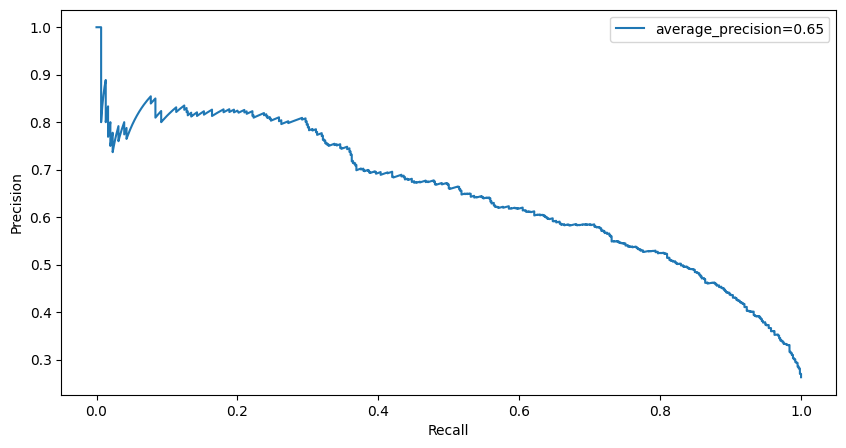

Model:Decision Tree
******************************


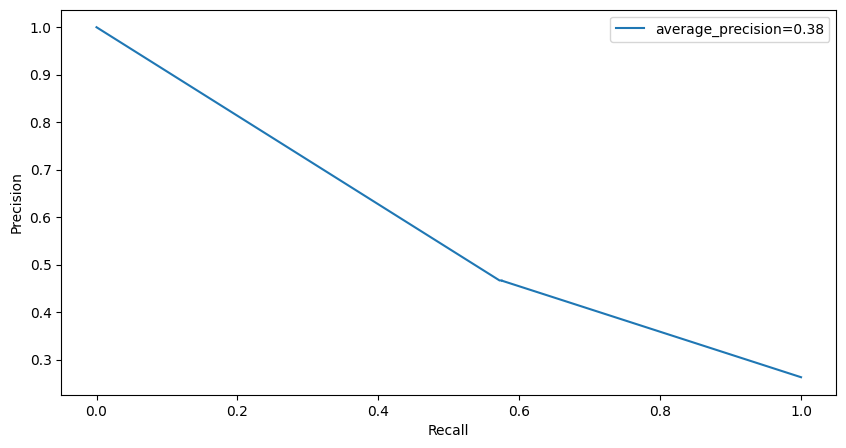

Model:Random Forest
******************************


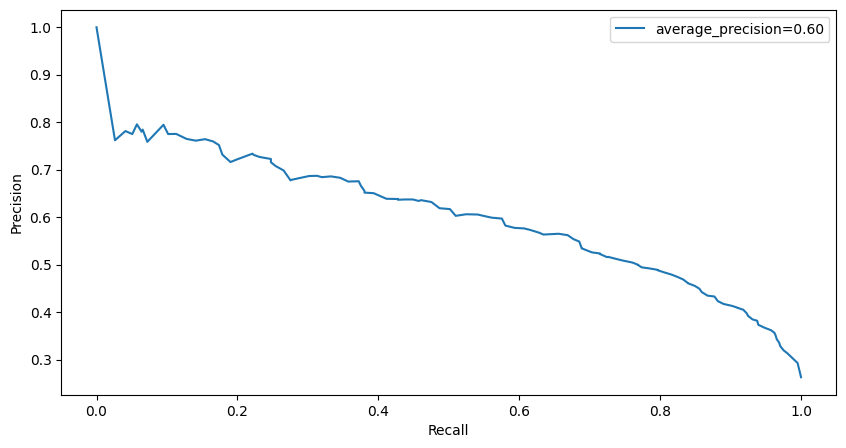

Model:Gradient Boosting
******************************


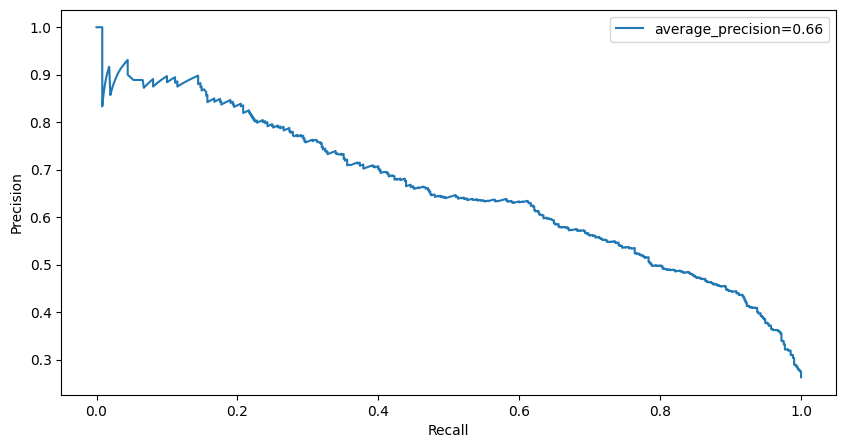

Model:SVC
******************************


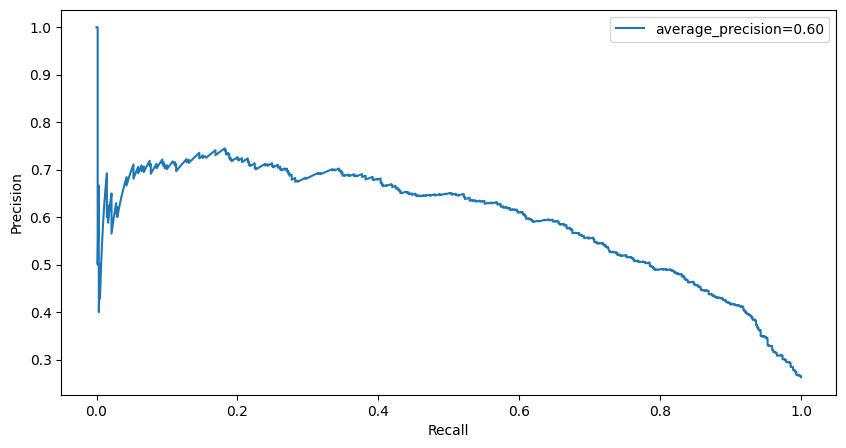

Model:KNN
******************************


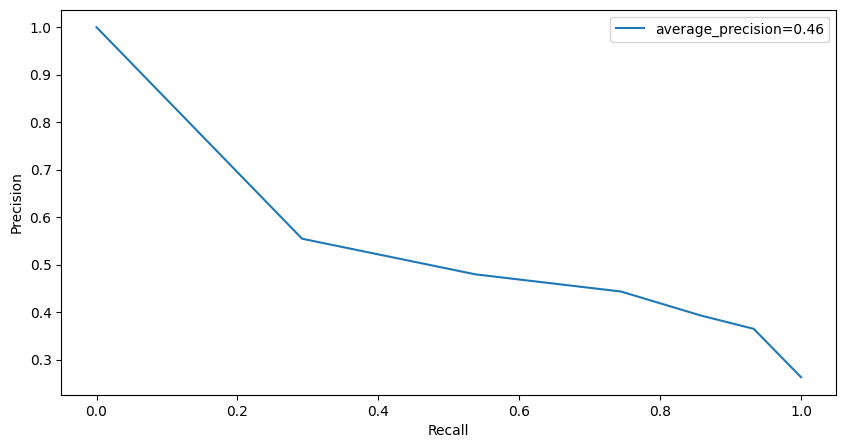

Model:XGBoost
******************************


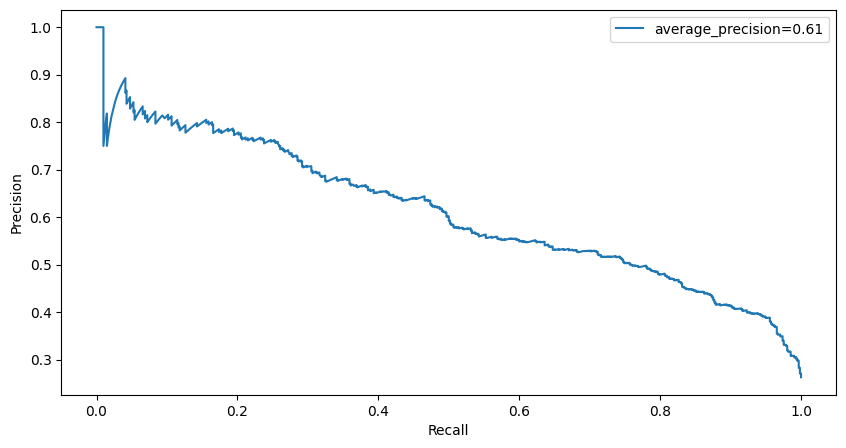

In [23]:
from sklearn.metrics import precision_recall_curve,average_precision_score
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  model_name=list(models.keys())[i]
  print(f'Model:{model_name}')
  print('*'*30)

  y_scores=model.predict_proba(X_test)[:,1]

  precision,recall,threshold=precision_recall_curve(y_test,y_scores)
  average_precision=average_precision_score(y_test,y_scores)


  plt.figure(figsize=(10,5))
  plt.plot(recall,precision,label=f'average_precision={average_precision:.2f}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  print('='*30)

Best params:{}
Logistic Regression
******************************
Model performance for Training set
- Accuracy: 0.7742
- Confusion matrix: 
 [[2525  927]
 [ 632 2820]]
- Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      3452
           1       0.75      0.82      0.78      3452

    accuracy                           0.77      6904
   macro avg       0.78      0.77      0.77      6904
weighted avg       0.78      0.77      0.77      6904

Model performance for Test set
- Accuracy: 0.7742
- Confusion matrix: 
 [[1261  450]
 [ 117  493]]
- Classification report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1711
           1       0.52      0.81      0.63       610

    accuracy                           0.76      2321
   macro avg       0.72      0.77      0.73      2321
weighted avg       0.81      0.76      0.77      2321



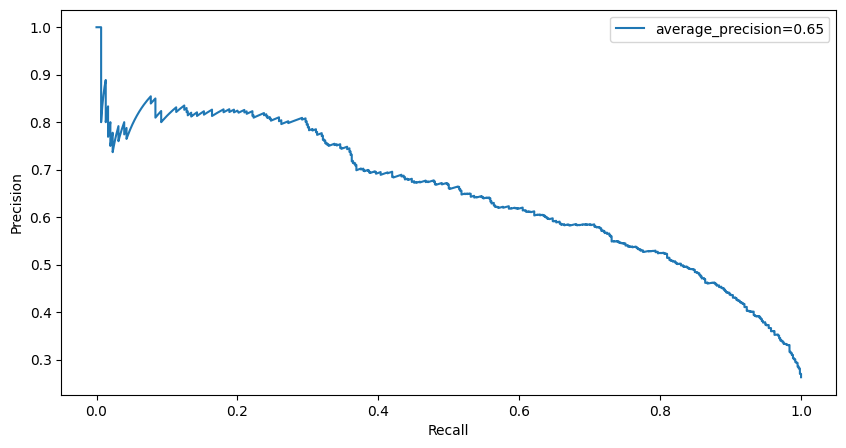

Best params:{'criterion': 'gini'}
Decision Tree
******************************
Model performance for Training set
- Accuracy: 0.9991
- Confusion matrix: 
 [[3451    1]
 [   5 3447]]
- Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3452
           1       1.00      1.00      1.00      3452

    accuracy                           1.00      6904
   macro avg       1.00      1.00      1.00      6904
weighted avg       1.00      1.00      1.00      6904

Model performance for Test set
- Accuracy: 0.9991
- Confusion matrix: 
 [[1313  398]
 [ 265  345]]
- Classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1711
           1       0.46      0.57      0.51       610

    accuracy                           0.71      2321
   macro avg       0.65      0.67      0.65      2321
weighted avg       0.74      0.71      0.72      2321



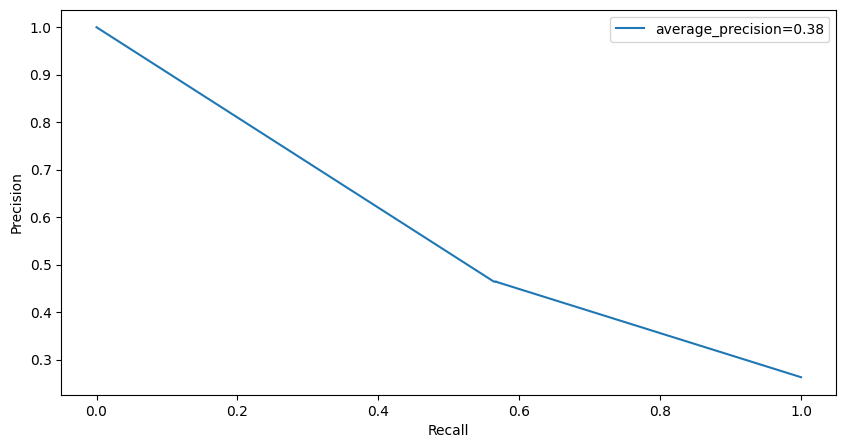

Best params:{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 200}
Random Forest
******************************
Model performance for Training set
- Accuracy: 0.9340
- Confusion matrix: 
 [[3074  378]
 [  78 3374]]
- Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      3452
           1       0.90      0.98      0.94      3452

    accuracy                           0.93      6904
   macro avg       0.94      0.93      0.93      6904
weighted avg       0.94      0.93      0.93      6904

Model performance for Test set
- Accuracy: 0.9340
- Confusion matrix: 
 [[1384  327]
 [ 193  417]]
- Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1711
           1       0.56      0.68      0.62       610

    accuracy                           0.78      2321
   macro avg       0.72      0.75      0.73      2321
weigh

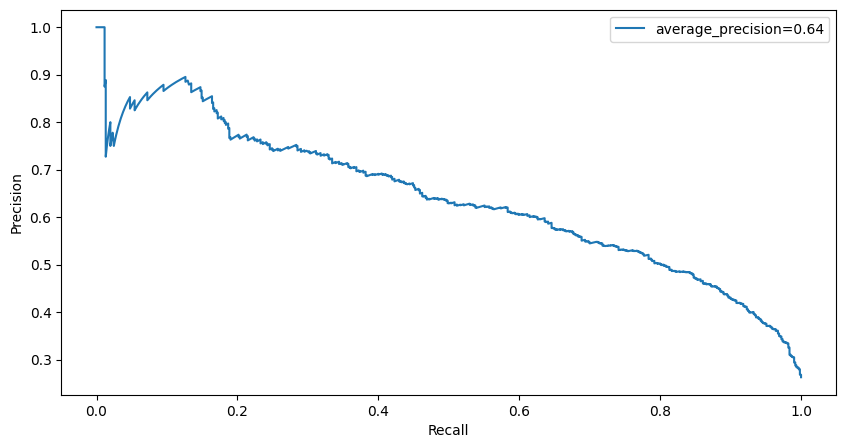

Best params:{'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting
******************************
Model performance for Training set
- Accuracy: 0.8602
- Confusion matrix: 
 [[2906  546]
 [ 419 3033]]
- Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      3452
           1       0.85      0.88      0.86      3452

    accuracy                           0.86      6904
   macro avg       0.86      0.86      0.86      6904
weighted avg       0.86      0.86      0.86      6904

Model performance for Test set
- Accuracy: 0.8602
- Confusion matrix: 
 [[1396  315]
 [ 190  420]]
- Classification report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1711
           1       0.57      0.69      0.62       610

    accuracy                           0.78      2321
   macro avg       0.73      0.75      0.74      2321
weighted avg       0.80      0.78      0.

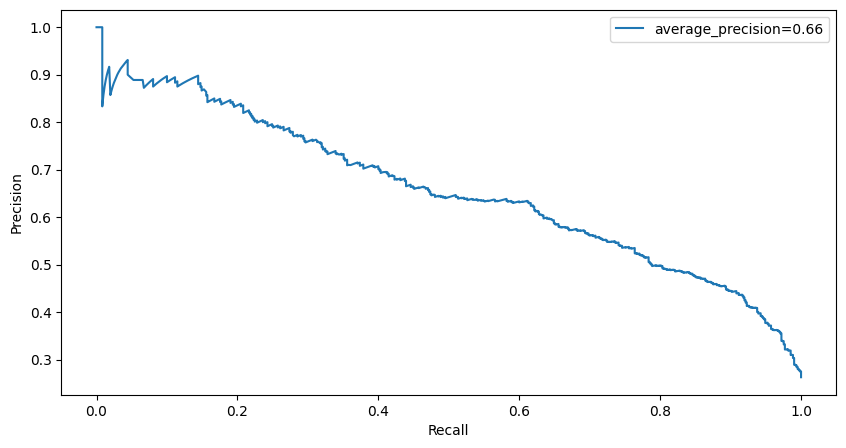

Best params:{'colsample_bytree': 0.8, 'max_depth': 30, 'n_estimators': 100}
XGBoost
******************************
Model performance for Training set
- Accuracy: 0.9974
- Confusion matrix: 
 [[3441   11]
 [   7 3445]]
- Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3452
           1       1.00      1.00      1.00      3452

    accuracy                           1.00      6904
   macro avg       1.00      1.00      1.00      6904
weighted avg       1.00      1.00      1.00      6904

Model performance for Test set
- Accuracy: 0.9974
- Confusion matrix: 
 [[1428  283]
 [ 277  333]]
- Classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1711
           1       0.54      0.55      0.54       610

    accuracy                           0.76      2321
   macro avg       0.69      0.69      0.69      2321
weighted avg       0.76      0.

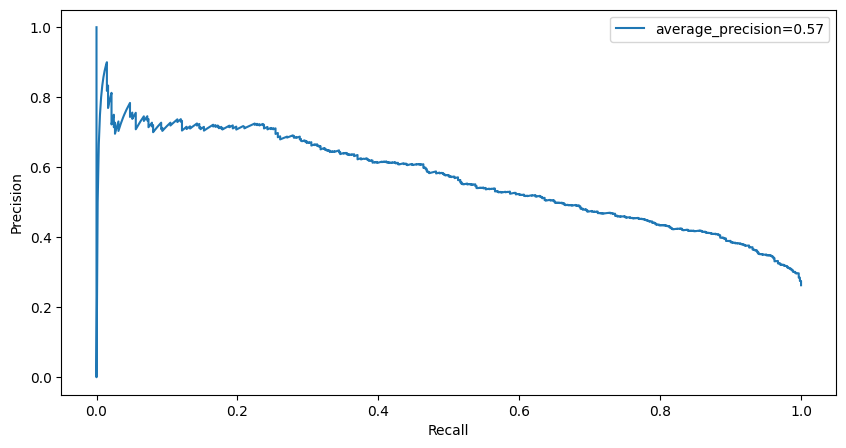

In [24]:
models={
    'Logistic Regression':LogisticRegression(class_weight='balanced'),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    # 'SVC':SVC(probability=True,class_weight='balanced'),
    # 'KNN':KNeighborsClassifier(),
    'XGBoost':XGBClassifier()
}
params={
    'Logistic Regression':{},
    'Decision Tree':{'criterion':['gini','entropy']},
    'Random Forest':{
        'n_estimators':[100,200,300,400,500],
        'max_features':['sqrt','log2'],
        'max_depth':[6,8,10,12],
        'criterion':['gini','entropy']
                     },
    'Gradient Boosting':{
        'n_estimators':[100,200,300,400,500],
         'learning_rate':[1,0.5,0.1,0.01]},
    # 'SVC':{'C':[0.1,1,10,100],'kernel':['linear','rbf']},
    # 'KNN':{'n_neighbors':[3,5,7,9]},
    'XGBoost':{
        'n_estimators':[100,200,300,400,500],
        'max_depth':[5,8,12,20,30],
        'n_estimators':[100,200,300],
        'colsample_bytree':[0.5,0.8,1,0.3,0.4]

        }
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    param=params[list(models.keys())[i]]

    gc=GridSearchCV(model,param,cv=5,scoring='f1',n_jobs=2)
    gc.fit(X_train,y_train)

    model.set_params(**gc.best_params_)
    model.fit(X_train,y_train)

    print(f'Best params:{gc.best_params_}')

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    print('*'*30)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Confusion matrix: \n {}".format(confusion_matrix(y_train,y_train_pred)))
    print("- Classification report: \n {}".format(classification_report(y_train,y_train_pred)))
    print('='*30)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Confusion matrix: \n {}".format(confusion_matrix(y_test,y_test_pred)))
    print("- Classification report:\n {}".format(classification_report(y_test,y_test_pred)))

    y_scores=model.predict_proba(X_test)[:,1]

    precision,recall,threshold=precision_recall_curve(y_test,y_scores)
    average_precision=average_precision_score(y_test,y_scores)


    plt.figure(figsize=(10,5))
    plt.plot(recall,precision,label=f'average_precision={average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()








              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1711
           1       0.59      0.65      0.62       610

    accuracy                           0.79      2321
   macro avg       0.73      0.74      0.74      2321
weighted avg       0.80      0.79      0.79      2321



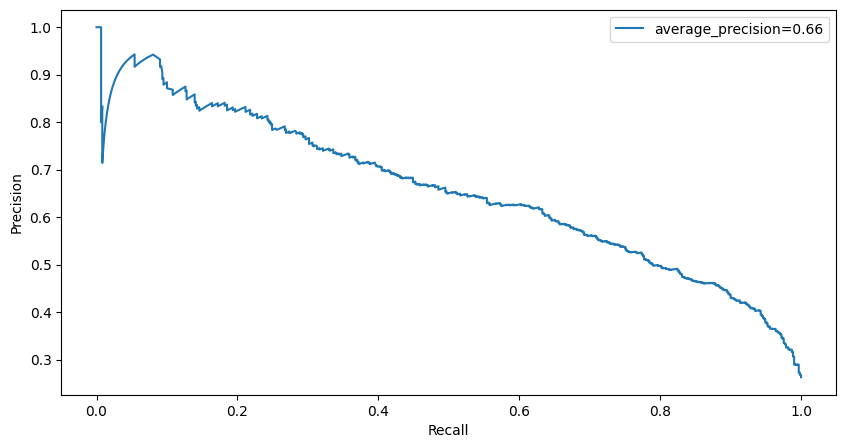

In [34]:
model=GradientBoostingClassifier(learning_rate=0.1, n_estimators=200)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

y_scores=model.predict_proba(X_test)[:,1]
precision,recall,threshold=precision_recall_curve(y_test,y_scores)
average_precision=average_precision_score(y_test,y_scores)
plt.figure(figsize=(10,5))
plt.plot(recall,precision,label=f'average_precision={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [35]:
import joblib

In [36]:
joblib.dump(model,'model.pkl')
joblib.dump(ct,'transformer.pkl')

['transformer.pkl']

In [46]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Load model and transformer
model = joblib.load('model.pkl')
transformer = joblib.load('transformer.pkl')

st.title("📉 Telco Customer Churn Prediction")

# Input form
gender = st.selectbox("Gender", ["Male", "Female"])
senior_citizen = st.selectbox("Senior Citizen", ["Yes", "No"])
partner = st.selectbox("Has Partner", ["Yes", "No"])
dependents = st.selectbox("Has Dependents", ["Yes", "No"])
tenure = st.slider("Tenure (in months)", 0, 72, 12)
phone_service = st.selectbox("Phone Service", ["Yes", "No"])
multiple_lines = st.selectbox("Multiple Lines", ["No", "Yes", "No phone service"])
internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
online_backup = st.selectbox("Online Backup", ["No", "Yes", "No internet service"])
device_protection = st.selectbox("Device Protection", ["No", "Yes", "No internet service"])
tech_support = st.selectbox("Tech Support", ["No", "Yes", "No internet service"])
streaming_tv = st.selectbox("Streaming TV", ["No", "Yes", "No internet service"])
streaming_movies = st.selectbox("Streaming Movies", ["No", "Yes", "No internet service"])
contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
paperless_billing = st.selectbox("Paperless Billing", ["Yes", "No"])
payment_method = st.selectbox("Payment Method", [
    "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"
])
monthly_charges = st.number_input("Monthly Charges", 0.0, 200.0, step=1.0)
total_charges = st.number_input("Total Charges", 0.0, 10000.0, step=1.0)

if st.button("Predict Churn"):
    # Create dataframe
    input_df = pd.DataFrame([{
        "gender": gender,
        "SeniorCitizen": 1 if senior_citizen == "Yes" else 0,
        "Partner": partner,
        "Dependents": dependents,
        "tenure": tenure,
        "PhoneService": phone_service,
        "MultipleLines": multiple_lines,
        "InternetService": internet_service,
        "OnlineSecurity": online_security,
        "OnlineBackup": online_backup,
        "DeviceProtection": device_protection,
        "TechSupport": tech_support,
        "StreamingTV": streaming_tv,
        "StreamingMovies": streaming_movies,
        "Contract": contract,
        "PaperlessBilling": paperless_billing,
        "PaymentMethod": payment_method,
        "MonthlyCharges": monthly_charges,
        "TotalCharges": total_charges
    }])

    # Transform and predict
    input_transformed = transformer.transform(input_df)
    prediction = model.predict(input_transformed)[0]

    if prediction == 1:
        st.error("⚠️ The customer is likely to **churn**.")
    else:
        st.success("✅ The customer is **not likely to churn**.")


Overwriting app.py


In [56]:
import sklearn
print(sklearn.__version__)

1.6.1
